In [31]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df = pd.read_csv('/content/drive/MyDrive/meta_data.csv')
col = df.columns[0].split(' ')

In [34]:
# getting columns
cols = []
for i in col:
    cols.append(i)
cols

['REFNUM', 'BG', 'CLASS', 'SEVERITY', 'X', 'Y', 'RADIUS']

In [35]:
li = list(df[df.columns[0]])
df_li = []
for i in li:
    temp_li = []
    temp = i.split(' ')
    df_li.append(temp)
print(len(df_li))
temp_df = pd.DataFrame(df_li)
temp_df.head()
temp_df.columns = cols
temp_df.head()

330


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,None,None,None,None
3,mdb004,D,NORM,None,None,None,None
4,mdb005,F,CIRC,B,477,133,30


In [36]:
not_normal_df = temp_df[~temp_df['CLASS'].str.contains('NORM')]
print(not_normal_df.shape)
not_normal_df.dropna(subset=['X'],inplace=True)
print(not_normal_df.shape)
not_normal_df.head()

(123, 7)
(119, 7)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
4,mdb005,F,CIRC,B,477,133,30
5,mdb005,F,CIRC,B,500,168,26
10,mdb010,F,CIRC,B,525,425,33


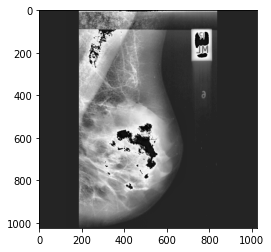

In [37]:
image = cv2.imread("/content/drive/MyDrive/dump/mdb002.png")
gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit = 5)
final_image = clahe.apply(gray) + 30
inverted_image = cv2.bitwise_not(final_image)
plt.imshow(final_image,cmap='gray')
plt.show()

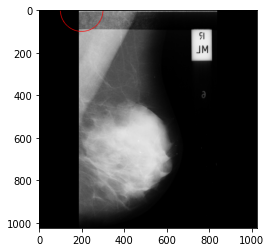

In [38]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(inverted_image)
cv2.circle(image, maxLoc, 100, (255, 0, 0), 2)
plt.imshow(image)

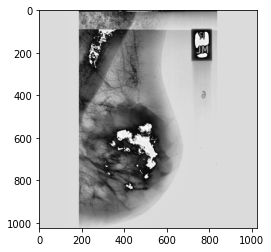

In [39]:
plt.imshow(inverted_image,cmap='gray')

2048